In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

# Read The Dataset

In [2]:
file_link = 'https://drive.google.com/file/d/1xkgz9ctaSnJmnXB_Ffc6OHig-rZcdthB/view?usp=sharing'
id = file_link.split("/")[-2]
dataset = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(dataset)

# Initial Observation

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Showing the unique class for label

In [4]:
unique_values = data['label'].unique()
print(unique_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Checking is there any null value exist or not

In [5]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


Dataset Shape

In [6]:
data.shape

(2200, 8)

Checking is there any Duplicate value or not

In [7]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2195,False
2196,False
2197,False
2198,False


Describe Dataset

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Preprocessing

Replace the naming convention

In [9]:
data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus','K':'Potassium','label':'Crops'}, inplace=True)

After replace the name the Dataset look

In [10]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
le

LabelEncoder()

In [14]:
data['Crops']=le.fit_transform(data[['Crops']])

After Encoding the Dataset look

In [15]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


Seeing the unique Class

In [16]:
unique_values = data['Crops'].unique()
print(unique_values)

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


Split the Dataset

In [18]:
x=data.drop('Crops',axis=1)

In [19]:
x

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [20]:
y=data[['Crops']]

In [21]:
y

,Crops
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [23]:
scaled_data

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [24]:
for col_name in x.columns:
    if x[col_name].nunique()>3:
        x[col_name]=scaler.fit_transform(x[[col_name]])

In [25]:
x

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


# Train Test Split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)



```
# This is formatted as code
```

# Model Function

In [27]:
def evaluation_of_classifier(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(ytest, ypred))
    accuracy_val = accuracy_score(ytest, ypred)
    print(f'{clf_name} Validation Accuracy: {accuracy_val:.2%}')
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()


# Logistic Regression Classifier

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_r=LogisticRegression()

In [30]:
logistic_r

LogisticRegression()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.88      0.85      0.86        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.98        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      0.91      0.85        34
           9       0.97      0.97      0.97        36
          10       0.81      0.95      0.88        22
          11       1.00      0.96      0.98        26
          12       0.97      1.00      0.98        32
          13       0.97      0.94      0.96        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00 

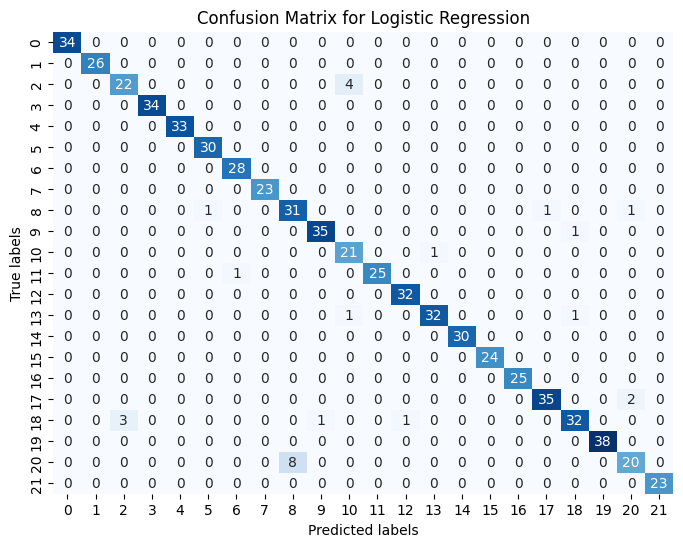

In [31]:
evaluation_of_classifier(logistic_r, xtrain, ytrain, xtest, ytest, "Logistic Regression")

## **Decision Tree Classifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
decision_t=DecisionTreeClassifier()

In [34]:
decision_t

DecisionTreeClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.86      0.94      0.90        34
           9       1.00      1.00      1.00        36
          10       0.96      1.00      0.98        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.94      0.97        34
          14       0.97      1.00      0.98        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1

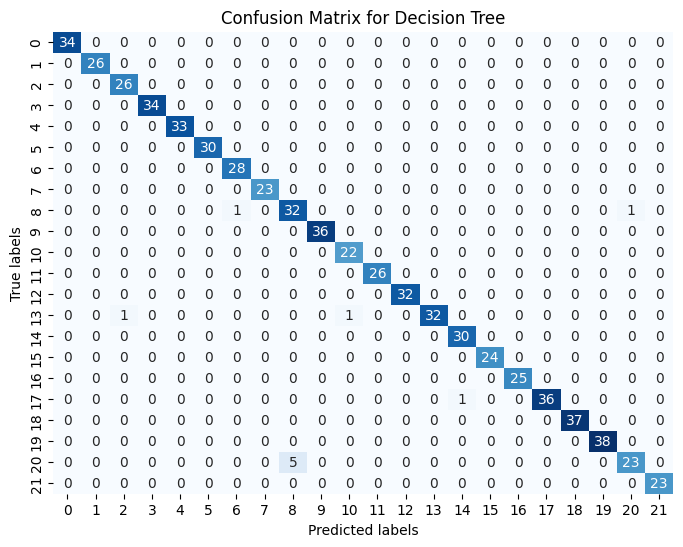

In [35]:
evaluation_of_classifier(decision_t, xtrain, ytrain, xtest, ytest, "Decision Tree")

# K nearest Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
kneighbors=KNeighborsClassifier(n_neighbors= 5)

In [38]:
kneighbors

KNeighborsClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.89      0.96      0.93        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.98        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      1.00      0.88        34
           9       0.95      1.00      0.97        36
          10       0.81      1.00      0.90        22
          11       1.00      0.96      0.98        26
          12       0.94      1.00      0.97        32
          13       1.00      0.88      0.94        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      0.96 

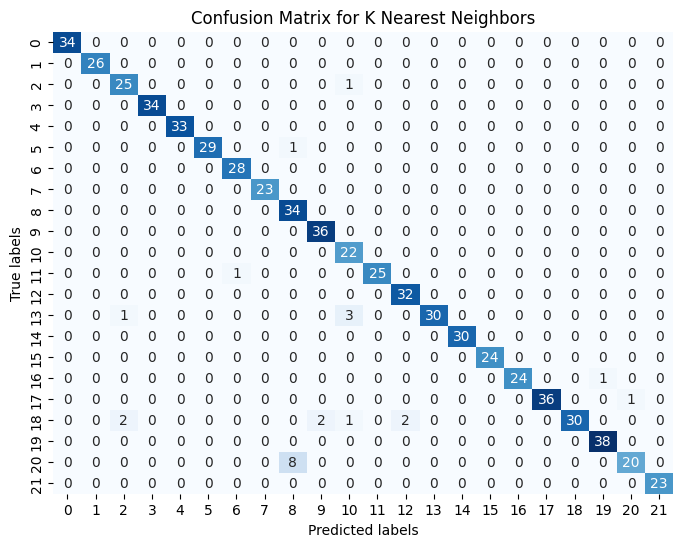

In [39]:
evaluation_of_classifier(kneighbors, xtrain, ytrain, xtest, ytest, "K Nearest Neighbors")

# Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gNb=GaussianNB()

In [42]:
gNb

GaussianNB()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.89      1.00      0.94        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.0

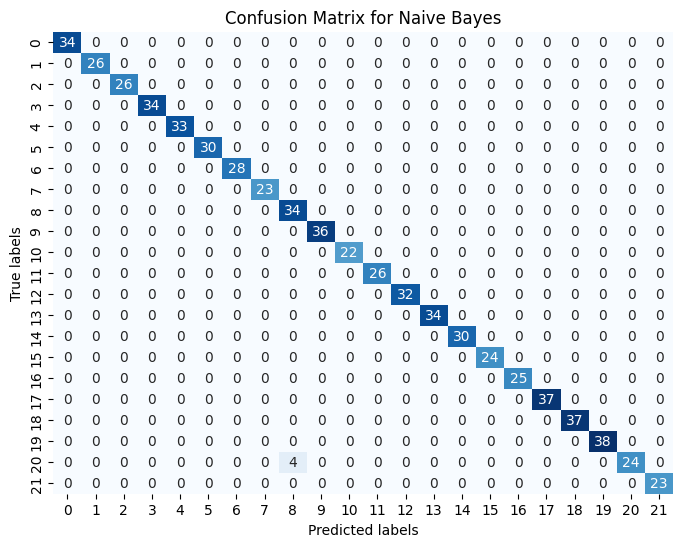

In [43]:
evaluation_of_classifier(gNb, xtrain, ytrain, xtest, ytest, "Naive Bayes")

# Model Evaluation

In [44]:
import numpy as np

def evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    accuracy_val = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    return {
        'Classifier': clf_name,
        'Accuracy': accuracy_val,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


Initialize Classifier

In [45]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

Taking a list for store metrices data

In [46]:
metrics_data = []


Evaluate classifiers and store metrics

In [47]:
for clf_name, clf in models.items():
    metrics = evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name)
    metrics_data.append(metrics)

Convert metrices data into dataframe and plot

In [48]:
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(50, 10))
colors = sns.color_palette('viridis', 4)

<Figure size 5000x1000 with 0 Axes>

# Plotting Graph of Accuracy for all model

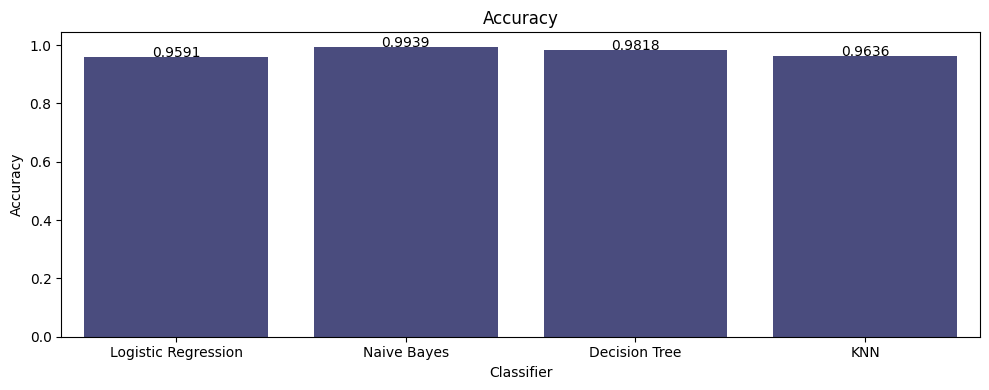

In [49]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df, palette=[colors[0]])
plt.title('Accuracy')
for index, value in enumerate(metrics_df['Accuracy']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()


# Plotting Graph of Precision for all model

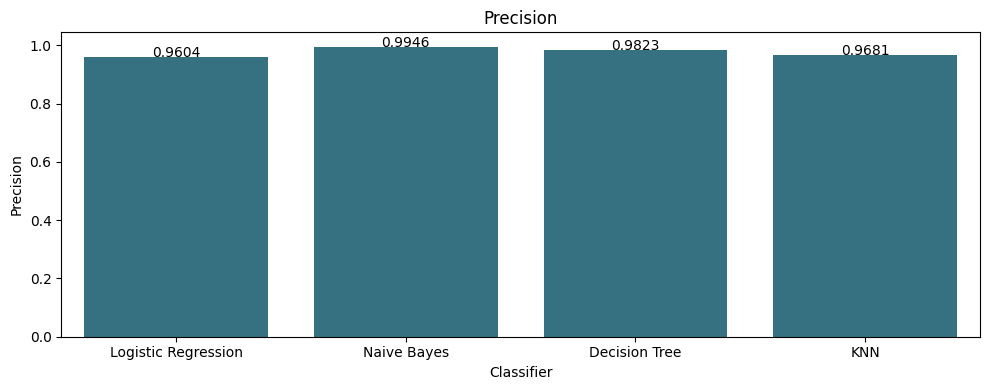

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Precision', data=metrics_df, palette=[colors[1]])
plt.title('Precision')
for index, value in enumerate(metrics_df['Precision']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()


# Plotting Graph of Recall for all model

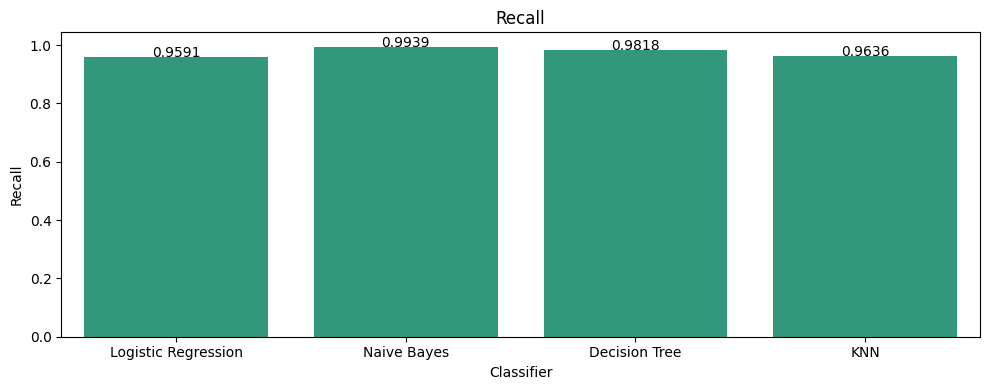

In [51]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Recall', data=metrics_df, palette=[colors[2]])
plt.title('Recall')
for index, value in enumerate(metrics_df['Recall']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Plotting Graph of F1 Score for all model

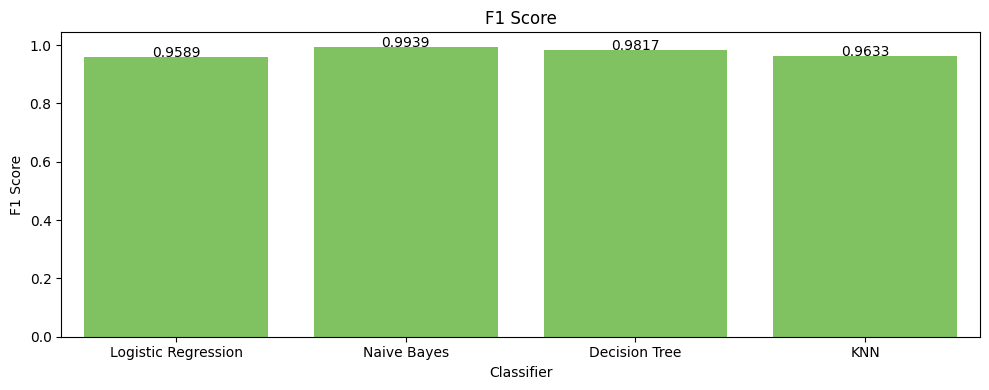

In [52]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='F1 Score', data=metrics_df, palette=[colors[3]])
plt.title('F1 Score')
for index, value in enumerate(metrics_df['F1 Score']):
    plt.text(index, value, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

# Evaluation for Training and Testing Accuracy for all model

Prediction Function

In [53]:
def train_predict(model, xtrain, ytrain, xtest):
    model.fit(xtrain, ytrain)
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    return train_accuracy, test_accuracy

Ploting Accuracies

In [54]:
def plot_accuracies(models, train_accuracies, test_accuracies):
    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 6))
    bars1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='orange')
    bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='lightgreen')

    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title('Prediction Accuracy on Training and Test Data for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)
    plt.tight_layout()
    plt.show()

Logistic Regression: Train Accuracy = 0.9779, Test Accuracy = 0.9591
KNN: Train Accuracy = 0.9870, Test Accuracy = 0.9636
Decision Tree: Train Accuracy = 1.0000, Test Accuracy = 0.9879
Naive Bayes: Train Accuracy = 0.9955, Test Accuracy = 0.9939


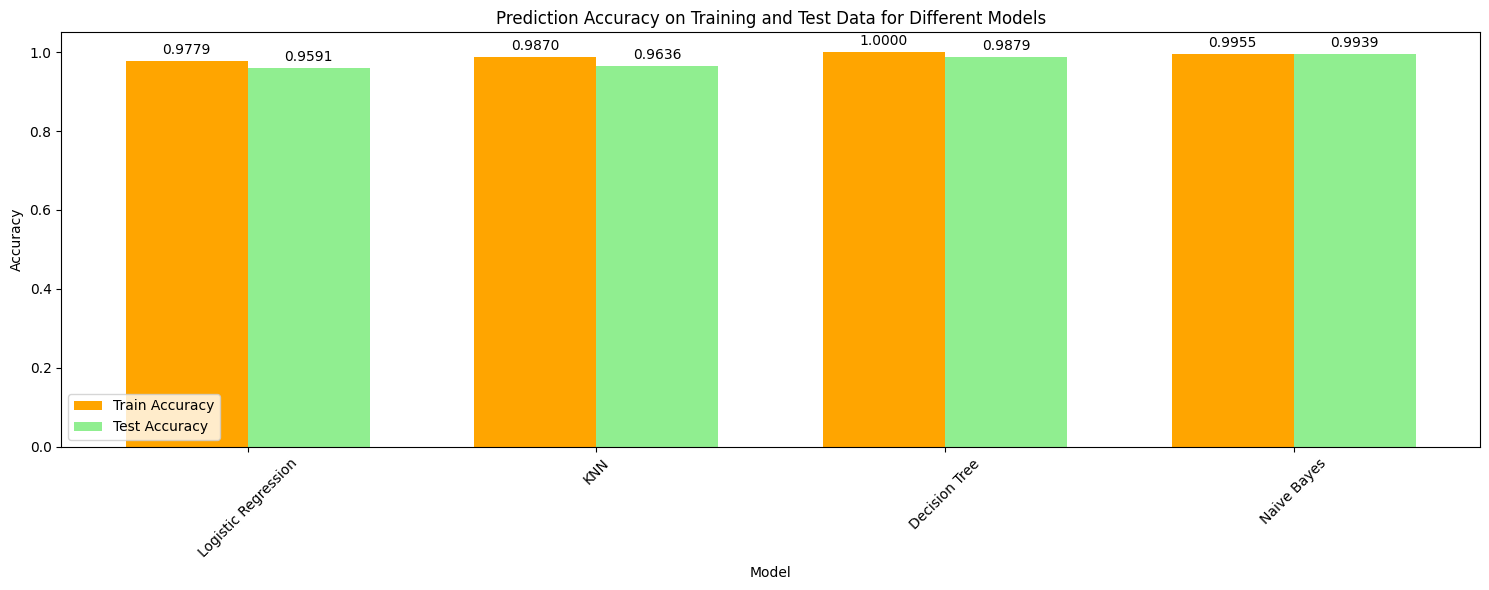

In [55]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB())
]

train_accuracies = []
test_accuracies = []
for model_name, model in models:
    train_accuracy, test_accuracy = train_predict(model, xtrain, ytrain, xtest)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"{model_name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")
plot_accuracies([model_name for model_name, _ in models], train_accuracies, test_accuracies)


# Poject Evaluation

To accomplish this, multiple machine learning methods were used and evaluated for their accuracy in predicting crop suitability. Our study looks at the performance of four prominent classifiers: Logistic Regression, Naive Bayes, Decision Tree, and K-Nearest Neighbors (KNN). Naive Bayes achieved the highest accuracy of 99.39%, followed by Decision Tree at 98.64%.
KNN achieved an impressive 97.73% accuracy, while Logistic Regression achieved 94.55%. Among that, Logistic Regression had the lowest accuracy at 94.55%, indicating potential limitations in its application to this job. These findings highlight the effectiveness of ensemble approaches such as Naive Bayes and Descision tree for making precise crop recommendations based on soil characteristics, as well as the importance of selecting algorithms that are adapted to the complexity of agricultural datasets. Such insights can considerably impact agricultural decision-making processes, leading to increased crop output and resource utilization efficiency.

